
<div align="center">
    <p font-size: 100px;"><b>Random Variate Generation</b></h1>
</div>



<div align="center">
    <p font-size: 100px;">NSPP (Non-Stationary Poisson Process) using Thinning Method</h1>
</div>

<div align="center">
    <p font-size: 100px;">Normal Variables using Box-Muller and Inverse Transform
</h1>
</div>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

## **Question 1**
The hourly customer arrivals to a gas station are going to be modeled as a non-stationary Poisson process with the following arrival rates


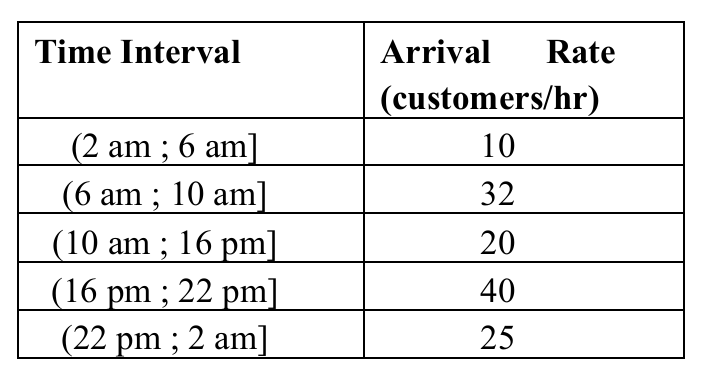

### **Question 1.a**
Write a program in python that generates the hourly number of arrivals for a specified time horizon. The program should take the length of time horizon in terms of days, and report the number of customers that arrived during each hour within this time horizon.

####  **Nonstationary Poisson Process**

$\lambda = max\{\lambda(t)\} = 40$

$ \text{Generate inter-arrival time with rate } \lambda$

$t = t+IA$

$p_t = \frac{λ(t)}{λ}$

$ \text{Generate } R \sim U(0, 1)$

$\text{If } R \leq p_t$

$T_i = t$

In [ ]:
# seed for reproducibility
np.random.seed(42)

# helper function to find corresponding lambda(t)
def _lambda(t):
  # start, end, lambda(t)
  arrival_rates = [ [0, 4, 10],
                    [4, 8, 32],
                    [8, 14, 20],
                    [14, 20, 40],
                    [20, 24, 25]]

  for start, end, lambda_t in arrival_rates:
    if start < t % 24 <= end: # t goes from 0 to (number of days) * 24, so check modulus 24 to find the corresponding hour within a day
      return lambda_t


# main function
def generate_nonstationary_poisson(days):

    lambda_ = max(10, 32, 20, 40, 25) # lambda = max(lambda(t))
    arrivals = []                     # Arrival hour T will be recorded
    t = 0                             # t will start from zero and will go all the way up to (day number) * 24.
                                      # I will not divide it to days. I will take modulus when necessary

    while True:

        R1 = np.random.uniform()  # Generate R ~ U(0, 1)
        interarrival = (-1 / lambda_) * np.log(R1)  # Generate Interarrival ~ Exp(lambda)
        t += interarrival

        # if time exceeds the day limit, break out of the while block
        if t > days * 24:
            break

        # find lambda(t) corresponding to the hour of the day
        lambda_t =_lambda(t)

        p_t = lambda_t / lambda_ # calculate the probability

        R2 = np.random.uniform()  # Generate R ~ U(0, 1)

        # If R2 <= probability, accept the time as an arrival time T
        if R2 <= p_t:
            arrivals.append(t)


    # t = 1, 2, 3, 4, ...
    hours = np.arange(1, days*24 + 1)
    # set all arrivals zero, for hours 1, 2, 3, 4, 5 ...
    number_of_arrivals = np.zeros(days * 24)
    # calculate the number of arrivals for each hour
    for i in arrivals:
      number_of_arrivals[int(i)] += 1

    # index is set hours
    number_of_arrivals =  pd.DataFrame(number_of_arrivals, index=hours, columns=['Number of Arrivals'])
    number_of_arrivals.index.name = 'Hours'
    return number_of_arrivals

### **Question 1.b**
 Run your program for 4 days, and plot the arrivals for the corresponding 96 hours with a line graph.

In [ ]:
number_of_arrivals = generate_nonstationary_poisson(4)
number_of_arrivals.head(5)

,Number of Arrivals
Hours,
1,9.0
2,10.0
3,13.0
4,12.0
5,32.0


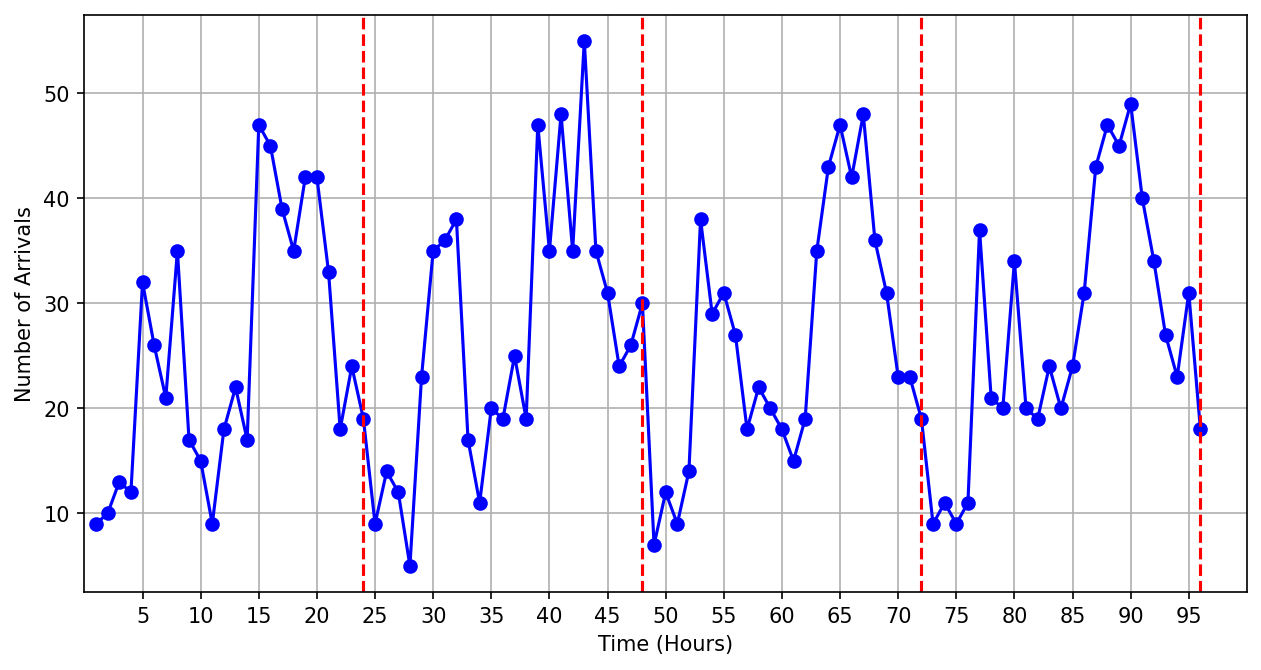

In [ ]:
hours = number_of_arrivals.index
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(hours, number_of_arrivals, marker="o", color="blue")
plt.xlabel('Time (Hours)')
plt.ylabel('Number of Arrivals')
plt.xticks(hours[hours % 5 == 0])
plt.axvline(x=24, color='red', linestyle='--') # Day 1
plt.axvline(x=48, color='red', linestyle='--') # Day 2
plt.axvline(x=72, color='red', linestyle='--') # Day 3
plt.axvline(x=96, color='red', linestyle='--') # Day 4
plt.xlim(0, 100)
plt.grid(True)

### **Question 1.c**
 Run the model for 10 days, and filter out the hourly arrivals for the (10 am; 16 pm] time interval. Formally test whether these arrival rates are actually distributed as Poisson with $λ$ = 20

To do that, let's compare Ei vs Oi and calculate the Chi-Square Statistic.

$H_0: Arrivals \sim Poisson(20)$

$H_1: Arrivals \nsim Poisson(20)$


In [ ]:
np.random.seed(31)
number_of_arrivals = generate_nonstationary_poisson(10)


# 8 < t <= 14, because (10, 16] is (8, 14] if we designate 2 a.m. as 0.
condition1 = 8 < number_of_arrivals.index % 24
condition2 = number_of_arrivals.index % 24 <= 14

# filter the arrivals
number_of_arrivals = number_of_arrivals[condition1 & condition2]
number_of_arrivals.reset_index(inplace=True)

days = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


def chi_square_test(data):
  Ei = 20
  Oi = data["Number of Arrivals"]

  Difference = (Oi - Ei)**2 / Ei

  chi_square =  np.sum(Difference)
  result_table = pd.DataFrame({'Expected Frequency': Ei, 'Observed Frequency': Oi, '(Oi-Ei)^2/Ei': Difference})

  print("\n")
  print("Day Number", day)
  print("Chi-Square (0.05, 5): ", 11.1)
  print("Chi-Square Statistic: ",chi_square)
  if chi_square < 11.1:
    print("Fail to reject the null hypothesis")
  else:
    print("Reject the null hypothesis")
  display(result_table)

for day in days:
  data = number_of_arrivals[6*(day-1): 6*day]
  data.reset_index(inplace=True)
  chi_square_test(data)



Day Number 1
Chi-Square (0.05, 5):  11.1
Chi-Square Statistic:  0.8500000000000001
Fail to reject the null hypothesis


,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,20,20.0,0.00
1,20,20.0,0.00
2,20,18.0,0.20
3,20,22.0,0.20
4,20,20.0,0.00
5,20,17.0,0.45




Day Number 2
Chi-Square (0.05, 5):  11.1
Chi-Square Statistic:  1.9000000000000001
Fail to reject the null hypothesis


,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,20,17.0,0.45
1,20,20.0,0.00
2,20,20.0,0.00
3,20,23.0,0.45
4,20,24.0,0.80
5,20,18.0,0.20




Day Number 3
Chi-Square (0.05, 5):  11.1
Chi-Square Statistic:  3.500000000000001
Fail to reject the null hypothesis


,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,20,22.0,0.20
1,20,13.0,2.45
2,20,20.0,0.00
3,20,17.0,0.45
4,20,18.0,0.20
5,20,22.0,0.20




Day Number 4
Chi-Square (0.05, 5):  11.1
Chi-Square Statistic:  14.2
Reject the null hypothesis


,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,20,33.0,8.45
1,20,14.0,1.80
2,20,21.0,0.05
3,20,15.0,1.25
4,20,13.0,2.45
5,20,22.0,0.20




Day Number 5
Chi-Square (0.05, 5):  11.1
Chi-Square Statistic:  10.600000000000001
Fail to reject the null hypothesis


,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,20,19.0,0.05
1,20,13.0,2.45
2,20,28.0,3.20
3,20,25.0,1.25
4,20,17.0,0.45
5,20,12.0,3.20




Day Number 6
Chi-Square (0.05, 5):  11.1
Chi-Square Statistic:  2.3
Fail to reject the null hypothesis


,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,20,16.0,0.80
1,20,16.0,0.80
2,20,22.0,0.20
3,20,23.0,0.45
4,20,21.0,0.05
5,20,20.0,0.00




Day Number 7
Chi-Square (0.05, 5):  11.1
Chi-Square Statistic:  6.5
Fail to reject the null hypothesis


,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,20,18.0,0.20
1,20,29.0,4.05
2,20,25.0,1.25
3,20,18.0,0.20
4,20,24.0,0.80
5,20,20.0,0.00




Day Number 8
Chi-Square (0.05, 5):  11.1
Chi-Square Statistic:  3.3
Fail to reject the null hypothesis


,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,20,22.0,0.20
1,20,15.0,1.25
2,20,16.0,0.80
3,20,24.0,0.80
4,20,22.0,0.20
5,20,21.0,0.05




Day Number 9
Chi-Square (0.05, 5):  11.1
Chi-Square Statistic:  1.25
Fail to reject the null hypothesis


,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,20,20.0,0.00
1,20,22.0,0.20
2,20,16.0,0.80
3,20,20.0,0.00
4,20,19.0,0.05
5,20,18.0,0.20




Day Number 10
Chi-Square (0.05, 5):  11.1
Chi-Square Statistic:  3.8999999999999995
Fail to reject the null hypothesis


,Expected Frequency,Observed Frequency,(Oi-Ei)^2/Ei
0,20,25.0,1.25
1,20,19.0,0.05
2,20,15.0,1.25
3,20,19.0,0.05
4,20,15.0,1.25
5,20,21.0,0.05


$
d.o.f = k - s - 1 = 6 - 0 - 1 = 5
$

$
\chi^2_{0.05, 5} = 11.1
$


$\text{Except for day 4;}$


$\chi^2_{0} < \chi^2_{0.05, 5}$
$\text{, we fail to reject the null hypothesis at a significance level of 0.05.}$

## **Question 2**
A certain random variable is Normal (5, 16). Generate 50 of such variables



### **Question 2.a**
Using the Box-Muller method. Report the sample mean and variance of the generated numbers.

#### **Box-Muller Method**
**Logic**

$\bar{z_1}, \bar{z_2}, \overset{\text{i.i.d.}}{\sim}
N(0, 1)$

$\bar{z_1}^2 + \bar{z_2}^2 = B^2$

$B^2 \sim χ_{d.o.f = 2}^2 ≈ Exp(λ=1/2)$

$B = -\frac{1}{λ} \cdot \ln(R_i), λ = 1/2$

$\bar{z_1}, \bar{z_2} = B \cdot sin(θ), B \cdot cos(θ)$

$z_1 = μ ⋅ \bar{z_1} + σ $

$z_2 = μ ⋅ \bar{z_2} + σ $





**Step 1**

Generate $R_1 \sim U(0, 1)$

$B^2 = -\frac{1}{\lambda} \cdot \ln(R_1) = -2 \cdot\ln(R_1) $



**Step 2**

Generate $R_2 \sim U(0, 1)$


$θ = R_2 \cdot 2π$

**Step 3**

$\bar{z_1} = \sqrt{-2\ln(R_1)} \cdot sin(2\pi R_2) = B \cdot sin(θ)$

$\bar{z_2} =  \sqrt{-2\ln(R_1)} \cdot cos(2\pi R_2)= B \cdot cos(θ)$

In [ ]:
np.random.seed(33)

def box_muller(n, mean, variance):

  std = np.sqrt(variance)
  _lambda_ = 0.5
  R_1 = np.random.uniform(size=int(n/2))
  R_2 = np.random.uniform(size=int(n/2))

  Bi = np.sqrt(-1/ _lambda_ * np.log(R_1))
  theta = 2 * np.pi * R_2

  z_1 = Bi * np.sin(theta)
  z_2 = Bi * np.cos(theta)
  z = np.concatenate([z_1, z_2])

  return mean + z * std


BM = box_muller(50, 5, 16)
BM

array([ 8.2602586 ,  3.54314245,  6.83028918,  1.15800017,  2.92269404,
        3.63630421, -5.0982422 ,  4.78680316,  8.06000123,  8.81237288,
        5.5084791 ,  3.11967747, 12.76948811, 10.55285294, -1.41034133,
        5.56027286,  6.69736462,  0.39621984,  6.07026628,  5.87102934,
        1.78542849, -1.61098051,  8.8869233 , 12.40969383, 10.42216071,
       10.82438045,  9.84061569, 10.01077209, -0.32057612,  4.64414141,
       12.2201254 ,  9.87407403,  3.78074716,  3.28058598,  2.0816777 ,
        5.93841853, -0.13012648,  9.54266814,  3.37774496,  9.10258874,
        4.52110412,  3.91060277,  3.83032928, 10.30086654,  0.02990459,
        4.62621823,  5.97123556,  5.2140379 ,  2.2692202 ,  9.68129603])

#### **Mean and Variance**

In [ ]:
BM.mean(), BM.var()

(5.487256232868043, 16.40083679275526)

### **Question 2.b**
 Using an alternative method. Report the sample mean and variance of the generated numbers.


#### **Inverse Transform Technique**
$ F(X_i) = Φ(\frac{X_i - μ}{σ}) =  R_i $


$ Φ^{-1}(R_i) = \frac{X_i - μ}{σ}$

$ X_i = μ + Φ^{-1}(R_i) \cdot σ$

In [ ]:
def phi_inverse(x):

  return stats.norm.ppf(x)

def inverse_transform(n, mean, variance):

  std = np.sqrt(variance)
  R = np.random.uniform(size=n)
  X = mean + phi_inverse(R) * std
  return X

IT = inverse_transform(50, 5, 16)
IT

array([ 5.96929888,  1.06418076,  8.39985262,  5.00126988, -1.23613064,
        3.90216215,  6.21956492,  1.46168363,  4.27298993, -0.38821061,
        7.48315194,  3.91708005,  3.39519949,  3.95432434, -3.44531559,
        4.68247807,  9.97600649,  1.04780541,  9.05182487,  2.60977818,
        7.93871649,  8.88041519, 10.15589325, 12.633271  ,  4.28468582,
        6.93912577,  3.19913742,  8.33074564,  4.34057306,  5.10222535,
        7.86820337,  1.24483791,  4.52205976, 10.08525259,  6.97527744,
        2.73921336,  4.20126017,  5.68433199, 12.38828461,  5.61108324,
       12.69865056,  1.19897005,  2.12185602,  5.66778663,  6.57714282,
       12.1899699 ,  9.81125189,  3.65377634,  3.37009199,  9.15727147])

#### **Mean and Variance**

In [ ]:
IT.mean(), IT.var()

(5.538207117556399, 13.294690143383209)

### **Question 2.c**
Report the total number of RNs used in both approaches, and compare their efficiencies   

In [ ]:
pd.DataFrame({'Box-Muller': [50, 50, "100%"], 'Inverse Transform': [50, 50, "100%"]}, index=['Number of RN', 'Number of RV', "Efficiency"])

,Box-Muller,Inverse Transform
Number of RN,50,50
Number of RV,50,50
Efficiency,100%,100%


### **Question 2.d**
Draw a Q-Q plot with the numbers you generated in (a) vs in the ones generated in (b). Comment on the fit between them

In [ ]:
def qq_plot(data1, data2):
  n = len(data1)
  data1 = np.sort(data1)
  data2 = np.sort(data2)

  fig, ax = plt.subplots(figsize=(8, 8))
  ax.scatter(data1, data2)
  x = np.arange(min(data1.min(), data2.min()), max(data1.max(), data2.max()))
  y = x
  plt.plot(x, y, color='red', linestyle='--')
  plt.xlabel('Data')
  plt.ylabel('Quantiles')
  plt.title('QQ Plot')
  plt.show()

Plot is close to a straight line. They are from the same distribution.

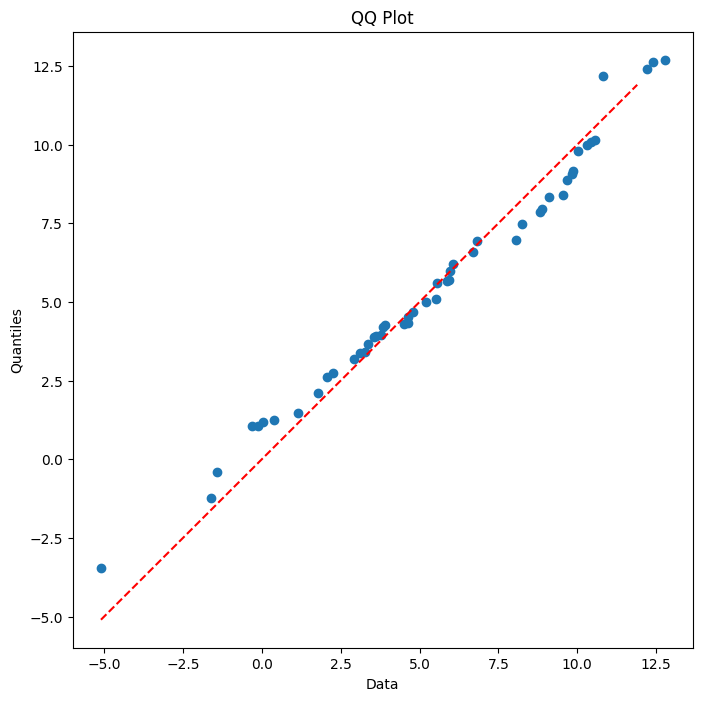

In [ ]:
qq_plot(BM, IT)